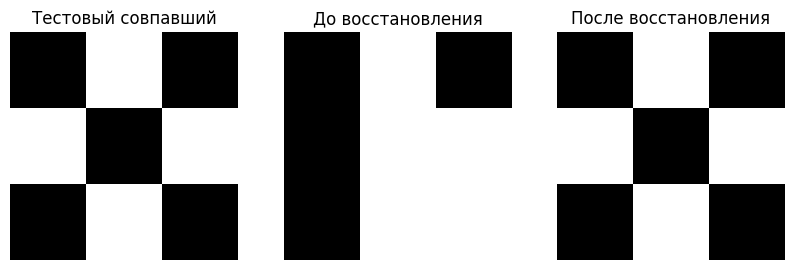

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class HopfieldNetwork:
    def __init__(self, num_neurons):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons))
    
    def train(self, patterns):
        """Обучение сети по набору паттернов с использованием правила Хебба"""
        for pattern in patterns:
            pattern = np.array(pattern)
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, 0)
        self.weights /= len(patterns)
    
    def recall(self, pattern, steps=10):
        """Восстановление образа"""
        pattern = np.array(pattern)
        for _ in range(steps):
            for i in range(self.num_neurons):
                pattern[i] = 1 if np.dot(self.weights[i], pattern) >= 0 else -1
        return pattern
        
    def energy(self, pattern):
        """Вычисление энергии состояния"""
        pattern = np.array(pattern)
        return -0.5 * np.dot(pattern, np.dot(self.weights, pattern))

def find_matching_pattern(patterns, recalled_pattern):
    """Поиск исходного паттерна, совпадающего с восстановленным"""
    for pattern in patterns:
        if np.array_equal(pattern, recalled_pattern):
            return pattern
    return None

def display_images(original, test, recalled, title_original="Тестовый совпавший", title_corrupted="До восстановления", title_recalled="После восстановления"):
    """Отображение исходного, тестового и восстановленного изображений"""
    side = int(np.sqrt(len(original)))
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    axes[0].imshow(original.reshape((side, side)), cmap="gray")
    axes[0].set_title(title_original)
    axes[0].axis("off")

    axes[1].imshow(test.reshape((side, side)), cmap="gray")
    axes[1].set_title(title_corrupted)
    axes[1].axis("off")

    axes[2].imshow(recalled.reshape((side, side)), cmap="gray")
    axes[2].set_title(title_recalled)
    axes[2].axis("off")

    plt.show()

# Пример использования сети Хопфилда на изображениях
if __name__ == "__main__":
    # Определение изображений (3x3)
    pattern1 = np.array([1, -1, 1, -1, -1, -1, 1, 1, 1])
    pattern2 = np.array([1, -1, 1, -1, 1, -1, 1, -1, 1])
    pattern3 = np.array([-1, 1, -1, 1, -1, 1, -1, 1, -1])
    patterns = [pattern1,pattern2, pattern3]
    
    # Создание сети и обучение
    hopfield = HopfieldNetwork(num_neurons=9)
    hopfield.train(patterns)
    
    # Восстановление образа
    test_pattern = np.array([-1, 1, -1, -1, 1, 1, -1, 1, 1])
    recalled_pattern = hopfield.recall(test_pattern)
    
    # Поиск совпадающего исходного паттерна
    matching_pattern = find_matching_pattern(patterns, recalled_pattern)
    
    if matching_pattern is not None:
        display_images(matching_pattern, test_pattern, recalled_pattern)
    else:
        print("Восстановленный паттерн не совпал ни с одним из исходных.")